In [18]:
import random
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as trf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
from dataclasses import dataclass

In [10]:
SEED_VALUE = 42

 #fix seed to make training deterministic
    
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
trf.random.set_seed(SEED_VALUE)

In [11]:
(X_train,y_train), (X_test,y_test) = cifar10.load_data()

print(X_train.shape)
print(X_test.shape)

170498071/170498071 [==============================] - 62s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


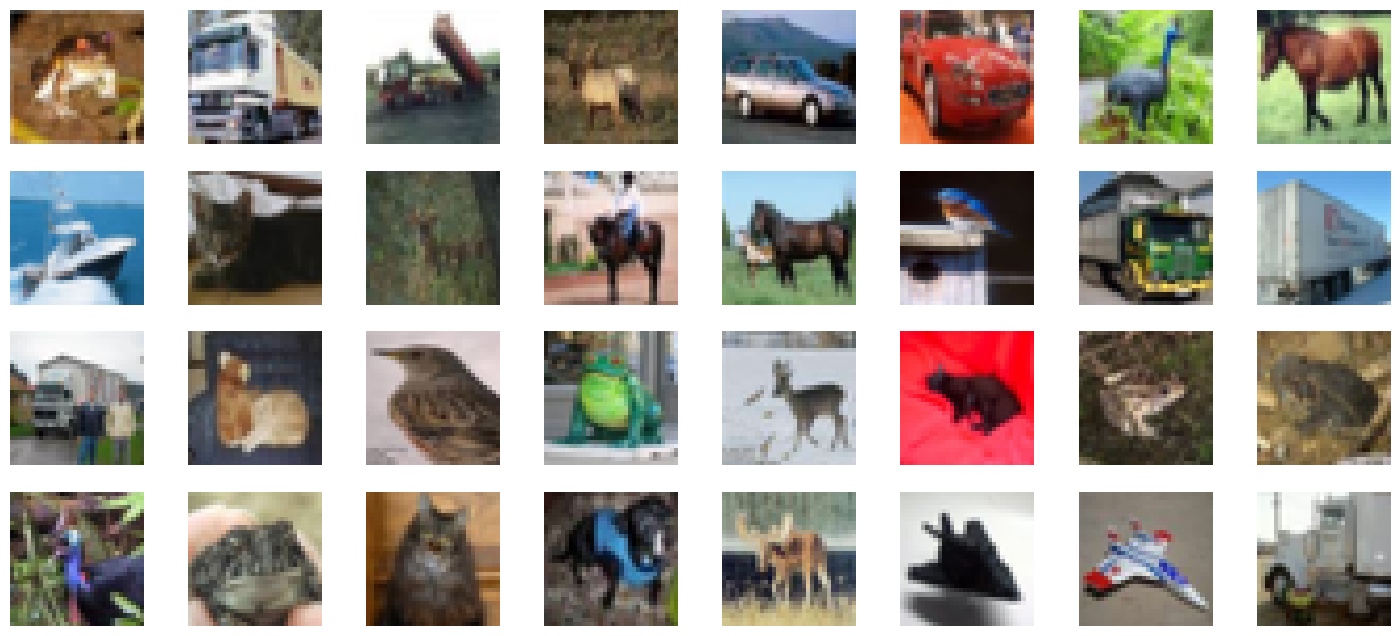

In [12]:
plt.figure(figsize=(18,8))

num_rows = 4
num_cols = 8

#plot each of the images in the batch and the associated ground truth labels.

for i in range(num_rows*num_cols):
    ax=plt.subplot(num_rows,num_cols, i+1)
    plt.imshow(X_train[i,:,:])
    plt.axis("off")

In [14]:
#normalise images to range [0,1]

X_train=X_train.astype("float32")/255
X_test=X_test.astype("float32")/255

#change the labels from integer to categorical data

print("Orignal (integer) label for the first training sample: ",y_train[0])

#convert labels to one-hot encoding
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

print('After conversion to categorical one-hot encoded label:', y_train[0])


Orignal (integer) label for the first training sample:  [6]
After conversion to categorical one-hot encoded label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [15]:
@dataclass(frozen=True)
class DatasetConfig:
    NUM_CLASSES: int=10
    IMG_HIEGHT: int=32
    IMG_WIDTH: int=32
    NUM_CHANNELS: int=3
    
@dataclass(frozen=True)
class TrainingConfig:
    EPOCHS: int=10
    BATCH_SIZE: int=256
    LEARNING_RATE: float=0.001

In [21]:
def cnn_model (input_shape=(32,32,3)):
    model=Sequential()

    #....................................
    #conv Block 1: 32 Filters, maxpool.
    #....................................
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    #.....................................
    #conv Block 2: 64 Filters, maxpool.
    #....................................
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', ))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    #.....................................
    #conv Block 3: 64 Filters, maxpool.
    #..........................................
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', ))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    #....................................
    #flatten the convolutiional features.
    #....................................
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    return model
    
    

In [22]:
#create the model.
model = cnn_model()
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                

In [30]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'],
             )

In [31]:
history = model.fit(X_train,
                    y_train,
                    batch_size=TrainingConfig.BATCH_SIZE,
                    epochs=TrainingConfig.EPOCHS,
                    verbose=1,
                    validation_split=.3,
                   )

Epoch 1/10


137/137 [==============================] - 112s 782ms/step - loss: 2.0779 - accuracy: 0.2402 - val_loss: 2.4675 - val_accuracy: 0.1917
Epoch 2/10
137/137 [==============================] - 111s 815ms/step - loss: 1.6945 - accuracy: 0.3869 - val_loss: 1.5674 - val_accuracy: 0.4333
Epoch 3/10
137/137 [==============================] - 114s 830ms/step - loss: 1.4790 - accuracy: 0.4644 - val_loss: 1.4012 - val_accuracy: 0.4857
Epoch 4/10
137/137 [==============================] - 111s 813ms/step - loss: 1.3228 - accuracy: 0.5251 - val_loss: 1.2819 - val_accuracy: 0.5388
Epoch 5/10
137/137 [==============================] - 117s 853ms/step - loss: 1.1956 - accuracy: 0.5734 - val_loss: 1.3363 - val_accuracy: 0.5518
Epoch 6/10
137/137 [==============================] - 127s 928ms/step - loss: 1.0733 - accuracy: 0.6177 - val_loss: 1.0834 - val_accuracy: 0.6129
Epoch 7/10
137/137 [==============================] - 112s 818ms/step - loss: 0.9584 - accuracy: 0.6607 - val_loss: 1.0811

In [32]:
#using the save() method, the model will be saved to the file system in the "savedmodel" format.
model.save('model')

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


In [33]:
from tensorflow.keras import models
reloaded_model=models.load_model('model')

In [36]:
test_loss, test_acc = reloaded_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc*100:3f}")

313/313 [==============================] - 7s 23ms/step - loss: 1.0107 - accuracy: 0.6567
Test accuracy: 65.670002


In [38]:
#generate prediction for the test dataset.
prediction = reloaded_model.predict(X_test)

#for each sample image in the test dataset, select the class label with highest probablity,
predicted_labels = [np.argmax(i) for i in prediction]

313/313 [==============================] - 7s 23ms/step


In [39]:
actual_labels=[np.argmax(i) for i in y_test]
print(actual_labels[:20])

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6]


In [40]:
print(predicted_labels [:20])

[3, 8, 8, 0, 3, 6, 1, 3, 3, 1, 0, 9, 5, 7, 9, 8, 5, 9, 8, 6]
